In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

## Load the data

In [25]:
# Load DataFrames
sound_fet_1 = pd.read_csv("../sound_fet/one_encoded_features.csv", header=None)
sound_fet_2 = pd.read_csv("../sound_fet/two_encoded_features.csv", header=None)
silence = pd.read_csv("../sound_fet/zeros.csv", header=None)
silence.iloc[0, :] = 0

## Do PCA with mixed data

In [69]:
list_data = [sound_fet_1, sound_fet_2, silence, sound_fet_1, sound_fet_2, 
             sound_fet_2, silence, silence, silence, sound_fet_1]
list_data_combined = pd.DataFrame(np.vstack(list_data))

pca = PCA(n_components=30)
list_data_pca = pca.fit_transform(list_data_combined).T

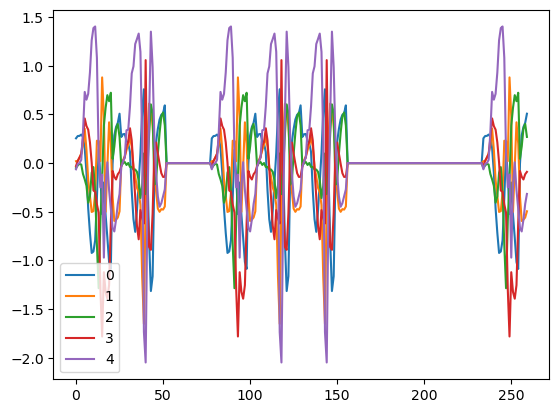

In [70]:
list_data_combined.iloc[:, :5].plot();

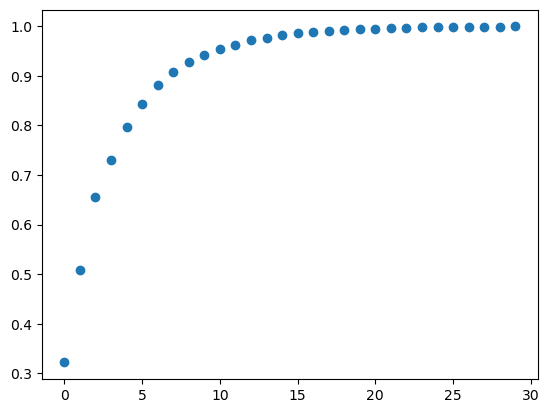

In [71]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o');

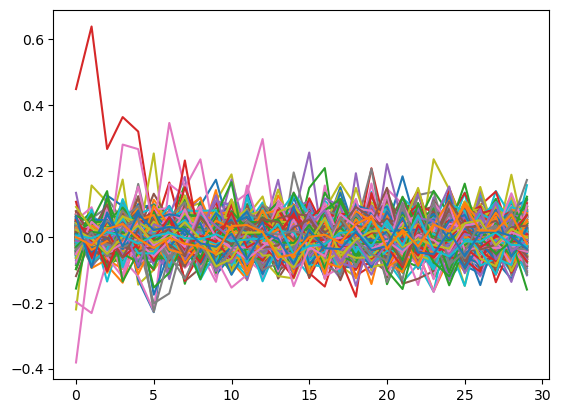

In [72]:
plt.plot(pca.components_);

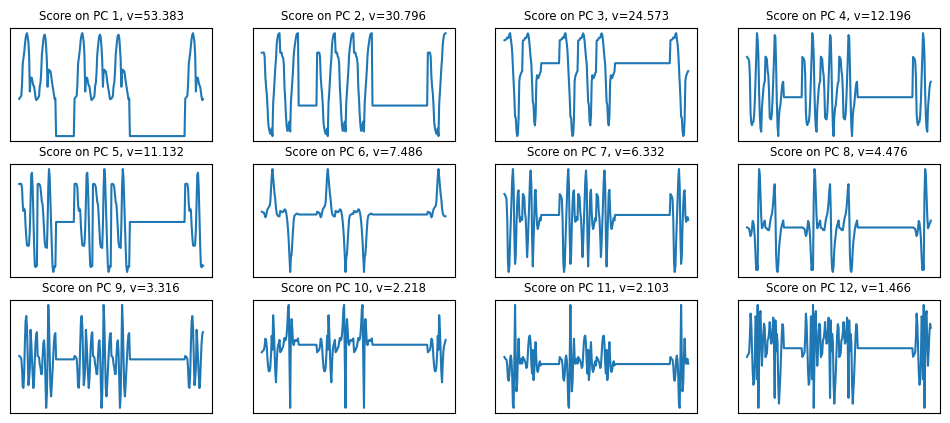

In [75]:
fig, axs = plt.subplots(3, 4, figsize=(12, 5));
for ix, ax in enumerate(axs.flatten()):
    ax.plot(list_data_pca[ix, :].T);
    ax.set_xticks([]);
    ax.set_yticks([]);
    ax.set_title(f'Score on PC {ix+1}, v={pca.explained_variance_[ix]:.3f}', fontsize='small');

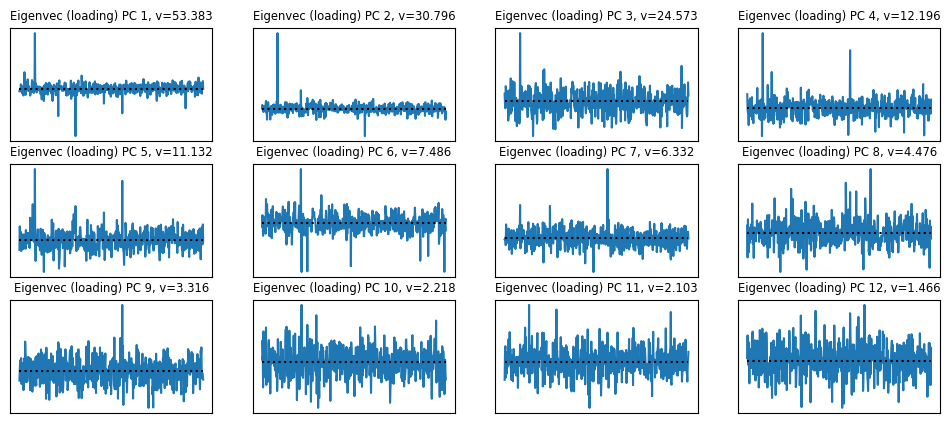

In [94]:
fig, axs = plt.subplots(3, 4, figsize=(12, 5));
for ix, ax in enumerate(axs.flatten()):
    ax.plot(pca.components_[ix, :].T);
    ax.plot([0, 511], [0, 0], 'k:');
    ax.set_xticks([]);
    ax.set_yticks([]);
    ax.set_title(f'Eigenvec (loading) PC {ix+1}, v={pca.explained_variance_[ix]:.3f}', fontsize='small');

In [78]:
pca.components_.shape

(30, 512)

In [85]:
np.argmax(pca.components_[0, :])

np.int64(43)

In [87]:
np.argmax(pca.components_[5, :])

np.int64(108)

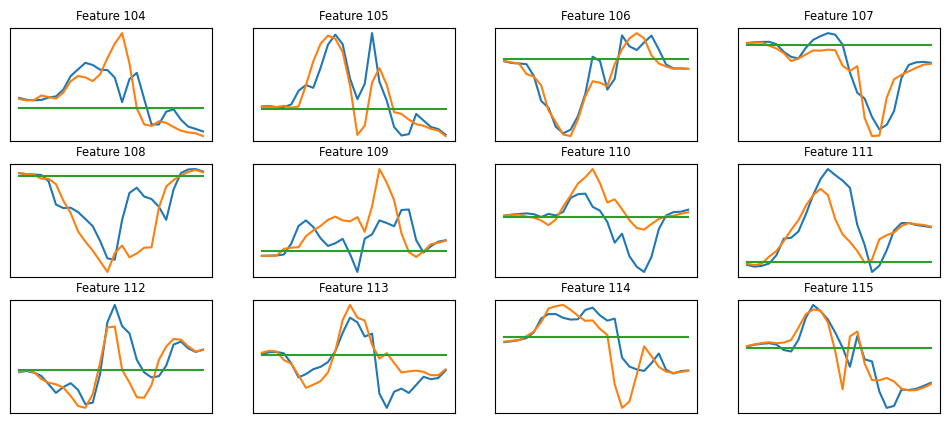

In [90]:
fig, axs = plt.subplots(3, 4, figsize=(12, 5));
for ix, ax in enumerate(axs.flatten()):
    c = 104+ix
    sound_fet_1.iloc[:, c].plot(ax=ax);
    sound_fet_2.iloc[:, c].plot(ax=ax);
    silence.iloc[:, c].plot(ax=ax); 
    ax.set_xticks([]);
    ax.set_yticks([]);
    ax.set_title(f'Feature {c}', fontsize='small');


In [102]:
def fplot(pc):
    mxix = np.argsort(np.abs(pca.components_[pc-1, :]))[-1:-13:-1]
    fig, axs = plt.subplots(3, 4, figsize=(12, 5));
    for ix, ax in enumerate(axs.flatten()):
        c = mxix[ix]
        sound_fet_1.iloc[:, c].plot(ax=ax);
        sound_fet_2.iloc[:, c].plot(ax=ax);
        silence.iloc[:, c].plot(ax=ax); 
        ax.set_xticks([]);
        #ax.set_yticks([]);
        ax.set_title(f'PC {pc}, Feature {c}', fontsize='small');

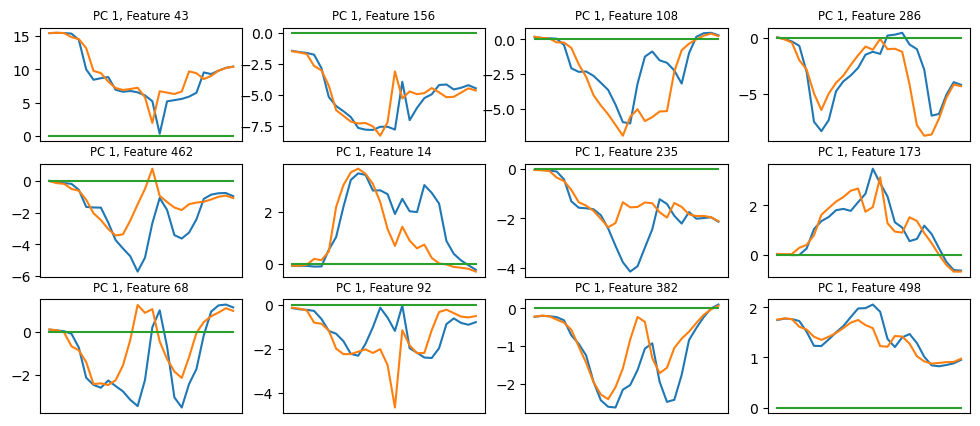

In [105]:
fplot(pc=1)

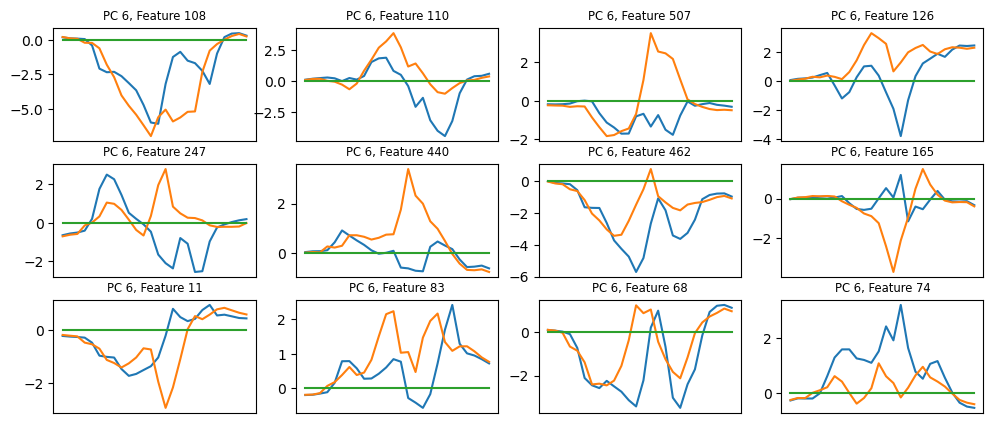

In [106]:
fplot(pc=6)

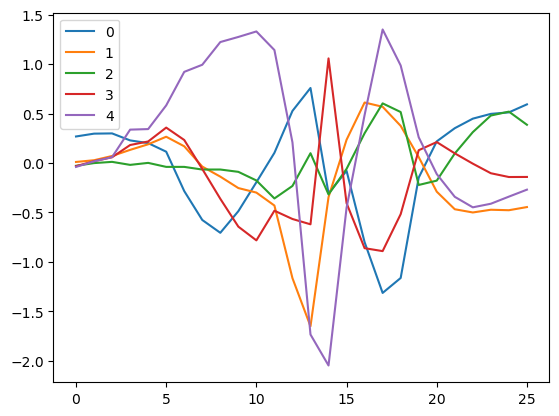

In [19]:
sound_fet_2.iloc[:, :5].plot();

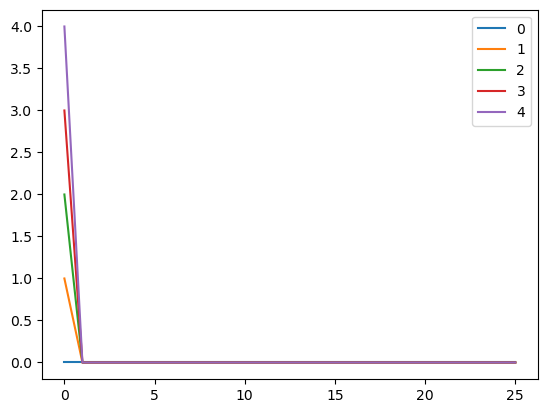

In [20]:
silence.iloc[:, :5].plot();

In [27]:
silence.describe()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
count,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,...,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
silence.iloc[:, -1]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
Name: 511, dtype: int64

In [24]:
sound_fet_1.iloc[:, -1]

0     0.087106
1     0.083209
2     0.083510
3     0.060758
4    -0.015920
5    -0.129398
6    -0.086765
7     0.032540
8    -0.078675
9    -0.087551
10    0.074587
11    0.140300
12    0.056622
13    0.314530
14    0.124557
15    0.618847
16   -1.039753
17   -0.792143
18   -0.715397
19   -0.676841
20   -0.730826
21   -0.374163
22   -0.312852
23   -0.250028
24   -0.221288
25   -0.307256
Name: 511, dtype: float64

## Explained variance

Text(0.5, 0, 'Number of Components')

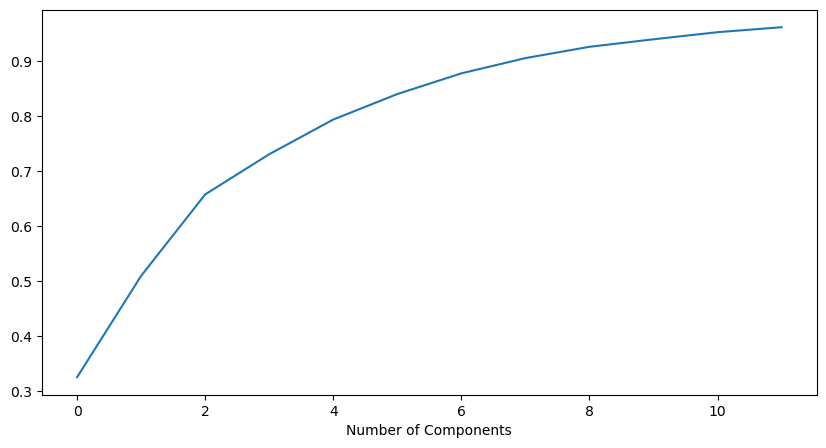

In [5]:
# plot the pca componets compared to explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')

## Score plot

/tmp/ipykernel_794341/3413507766.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(list_data_pca[0], list_data_pca[1], cmap='viridis')


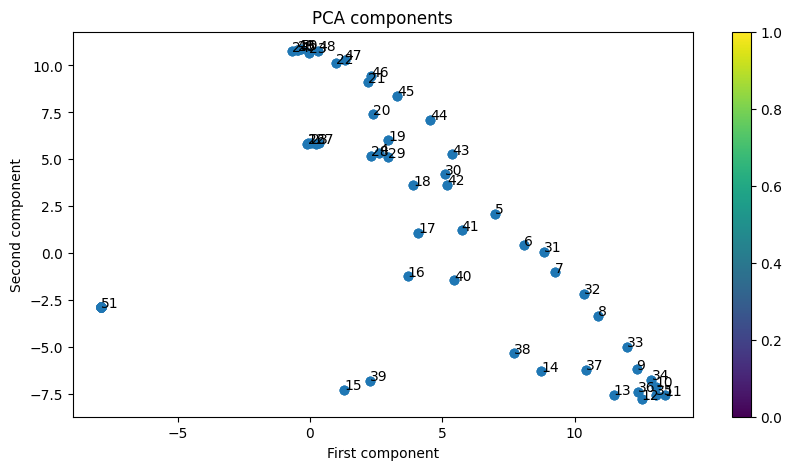

In [12]:
# make a score plot for the 8 first componetes, color change based on the sequence
plt.figure(figsize=(10, 5))
plt.scatter(list_data_pca[0], list_data_pca[1], cmap='viridis')
# number the points according to the sequence
for i, txt in enumerate(range(1, 52)):
    plt.annotate(txt, (list_data_pca[0][i], list_data_pca[1][i]))

plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA components')
plt.colorbar()
plt.show()

## Score plot at given t

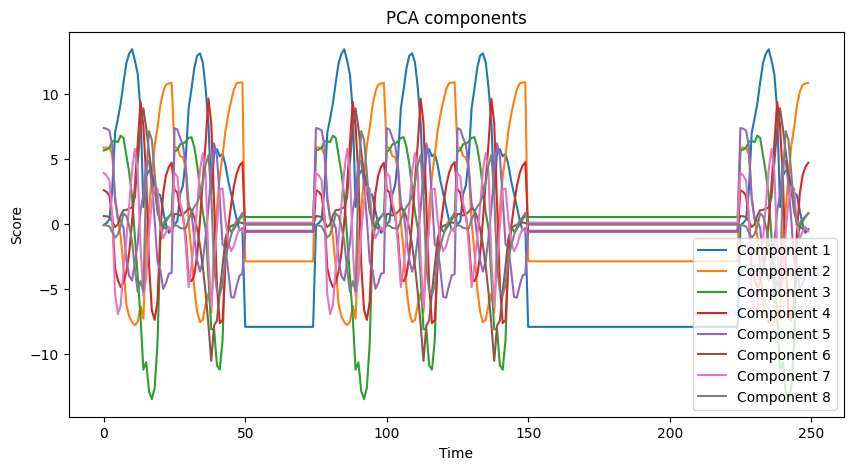

In [13]:
# plot the scores for the first 8 components
plt.figure(figsize=(10, 5))
plt.plot(list_data_pca[0])
plt.plot(list_data_pca[1])
plt.plot(list_data_pca[2])
plt.plot(list_data_pca[3])
plt.plot(list_data_pca[4])
plt.plot(list_data_pca[5])
plt.plot(list_data_pca[6])
plt.plot(list_data_pca[7])
plt.xlabel('Time')
plt.ylabel('Score')
plt.title('PCA components')
plt.legend(['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8'])